In [85]:
import numpy as np
from scipy.stats import norm, anderson
import pandas as pd
np.set_printoptions(precision=2)
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

In [35]:
price_table = pd.read_csv('spy_complete_adj.csv',parse_dates=[0])
print(price_table)

           Date     AdjOpen    AdjClose     AdjHigh      AdjLow
0    2017-01-20  226.699997  226.740005  227.309998  225.970001
1    2017-01-19  226.839996  225.910004  227.000000  225.410004
2    2017-01-18  226.539993  226.750000  226.800003  225.899994
3    2017-01-17  226.309998  226.250000  226.779999  225.800003
4    2017-01-13  226.729996  227.050003  227.399994  226.690002
5    2017-12-01  226.500000  226.529999  226.750000  224.960007
6    2017-11-01  226.360001  227.100006  227.100006  225.589996
7    2017-10-01  226.479996  226.460007  227.449997  226.009995
8    2017-09-01  226.910004  226.460007  227.070007  226.419998
9    2017-06-01  226.529999  227.210007  227.750000  225.899994
10   2017-05-01  226.270004  226.399994  226.580002  225.479996
11   2017-04-01  225.240005  226.580002  226.750000  225.240005
12   2017-03-01  225.039993  225.240005  225.830002  223.880005
13   2016-12-30  224.729996  223.529999  224.830002  222.729996
14   2016-12-29  224.479996  224.350006 

In [66]:
returns = {'date':[],'duration':[],'return_day':[],'return_tradeday':[]}
for i in price_table.index:
    if i==0:
        continue
    returns['date'].append(price_table.Date[i-1])
    duration = price_table.Date[i-1]-price_table.Date[i]
    returns['duration'].append(duration)
    returns['return_tradeday'].append(np.log(price_table.AdjClose[i-1] / price_table.AdjClose[i]))
    returns['return_day'].append(np.log(price_table.AdjClose[i-1] / price_table.AdjClose[i]) / 
                                 (duration.total_seconds()/60/60/24))

RETURNS:
Mean:     0.0002
Mean_y:   0.0606

Std:      0.0077
Std_y:    0.1475


<IPython.core.display.Javascript object>


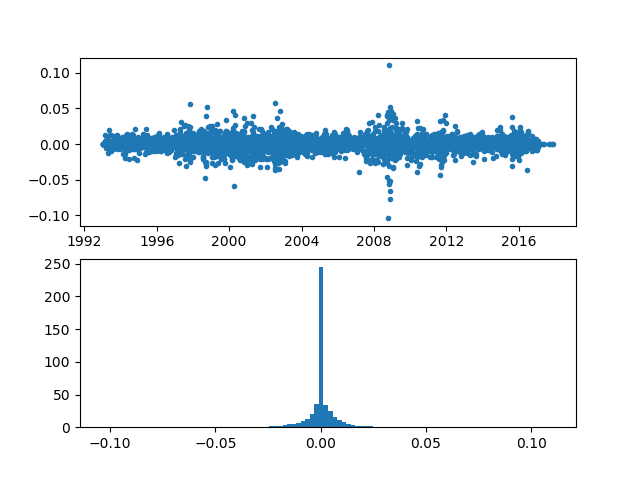

In [72]:
print('RETURNS:')
print('Mean:     {:.4f}'.format(np.mean(returns['return_day'])))
print('Mean_y:   {:.4f}'.format(np.exp(np.mean(returns['return_day'])*365)-1))
print()
print('Std:      {:.4f}'.format(np.std(returns['return_day'])))
print('Std_y:    {:.4f}'.format(np.std(returns['return_day'])/np.sqrt(1/365)))
plt.figure()
plt.subplot(2,1,1)
plt.plot(returns['date'],returns['return_day'],marker='.',ls='')
plt.subplot(2,1,2)
plt.hist(returns['return_day'],100,normed=True);

<IPython.core.display.Javascript object>


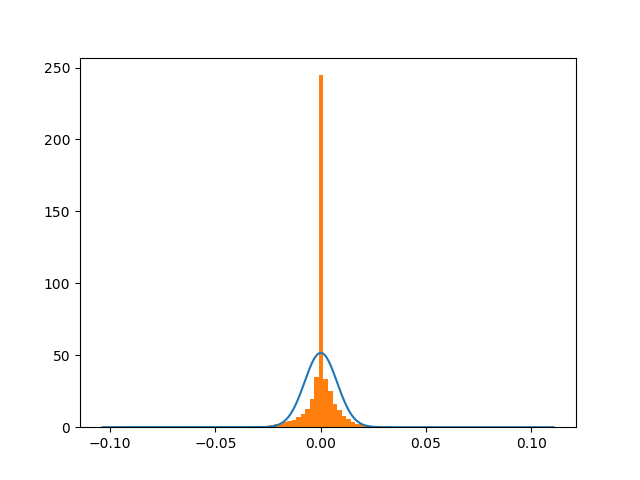

In [90]:
x = np.arange(np.min(returns['return_day']),np.max(returns['return_day']), 0.0001)
y_normal = norm.pdf(x, loc=0, scale=np.std(returns['return_day']))
plt.figure()
plt.plot(x,y_normal)
plt.hist(returns['return_day'],100,normed=True);


In [89]:
anderson(returns['return_day'],dist='norm')

AndersonResult(statistic=517.12530897494889, critical_values=array([ 0.58,  0.66,  0.79,  0.92,  1.09]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))